In [139]:
import pandas as pd
import numpy as np
import glob

In [140]:
# Lectura de los archivos csv y guardado de todos los datos en un archivo único.
# Pongo dtype=object porque sale un warning porque hay types mixtos. Esto cambia todos los tipos a object
# aunque inicialmente puede ser mejor dejarlos como están ya que casi todas las columnas son float
# e interesa que sigan así.

#df1 = pd.read_csv('../data/raw/data_1.csv',dtype=object)
#df2 = pd.read_csv('../data/raw/data_all.csv', dtype=object)

df1 = pd.read_csv('../data/raw/data_1.csv')
df2 = pd.read_csv('../data/raw/data_all.csv')
list_df = [df2,df1]
data_all_parameters = pd.concat(list_df, ignore_index=False, axis=0, sort=False)
data_all_parameters.to_csv('../data/raw/data_all_parameters.csv')
data_all_parameters

,Date,Time,New Device Time,BG Reading (mg/dL),Linked BG Meter ID,Basal Rate (U/h),Temp Basal Amount,Temp Basal Type,Temp Basal Duration (h:mm:ss),Bolus Type,...,Scroll Step Size,Insulin Action Curve Time,Sensor Calibration Rejected Reason,Preset Bolus,Bolus Source,Network Device Associated Reason,Network Device Disassociated Reason,Network Device Disconnected Reason,Sensor Exception,Preset Temp Basal Name
0,25/03/2020,23:10:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25/03/2020,23:10:52,NaN,NaN,NaN,1.95,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25/03/2020,23:10:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25/03/2020,23:10:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,25/03/2020,23:04:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38915,16/11/2015,15:22:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,...,NaN,NaN,NaN,NaN,BOLUS_WIZARD,NaN,NaN,NaN,NaN,NaN
38916,16/11/2015,15:16:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Normal,...,NaN,NaN,NaN,NaN,BOLUS_WIZARD,NaN,NaN,NaN,NaN,NaN
38917,16/11/2015,15:16:55,NaN,165.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38918,16/11/2015,15:16:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,STEP_0_POINT_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
data = data_all_parameters
data.dtypes


Date                                    object
Time                                    object
New Device Time                         object
BG Reading (mg/dL)                     float64
Linked BG Meter ID                      object
Basal Rate (U/h)                       float64
Temp Basal Amount                      float64
Temp Basal Type                         object
Temp Basal Duration (h:mm:ss)           object
Bolus Type                              object
Bolus Volume Selected (U)              float64
Bolus Volume Delivered (U)             float64
Bolus Duration (h:mm:ss)                object
Prime Type                              object
Prime Volume Delivered (U)             float64
Alarm                                   object
Suspend                                 object
Rewind                                  object
BWZ Estimate (U)                       float64
BWZ Target High BG (mg/dL)             float64
BWZ Target Low BG (mg/dL)              float64
BWZ Carb Rati

In [142]:
data.columns

Index(['Date', 'Time', 'New Device Time', 'BG Reading (mg/dL)',
       'Linked BG Meter ID', 'Basal Rate (U/h)', 'Temp Basal Amount',
       'Temp Basal Type', 'Temp Basal Duration (h:mm:ss)', 'Bolus Type',
       'Bolus Volume Selected (U)', 'Bolus Volume Delivered (U)',
       'Bolus Duration (h:mm:ss)', 'Prime Type', 'Prime Volume Delivered (U)',
       'Alarm', 'Suspend', 'Rewind', 'BWZ Estimate (U)',
       'BWZ Target High BG (mg/dL)', 'BWZ Target Low BG (mg/dL)',
       'BWZ Carb Ratio (U/Ex)', 'BWZ Insulin Sensitivity (mg/dL/U)',
       'BWZ Carb Input (exchanges)', 'BWZ BG Input (mg/dL)',
       'BWZ Correction Estimate (U)', 'BWZ Food Estimate (U)',
       'BWZ Active Insulin (U)', 'Sensor Calibration BG (mg/dL)',
       'Sensor Glucose (mg/dL)', 'ISIG Value', 'Event Marker', 'Bolus Number',
       'Bolus Cancellation Reason', 'BWZ Unabsorbed Insulin Total (U)',
       'Final Bolus Estimate', 'Scroll Step Size', 'Insulin Action Curve Time',
       'Sensor Calibration Rejected

In [143]:
# Se muestran los valores nulos

data.isnull().sum()

Date                                       0
Time                                       0
New Device Time                        72515
BG Reading (mg/dL)                     63014
Linked BG Meter ID                     67005
Basal Rate (U/h)                       44119
Temp Basal Amount                      71862
Temp Basal Type                        71862
Temp Basal Duration (h:mm:ss)          71862
Bolus Type                             59447
Bolus Volume Selected (U)              59477
Bolus Volume Delivered (U)             66006
Bolus Duration (h:mm:ss)               72509
Prime Type                             71687
Prime Volume Delivered (U)             71687
Alarm                                  68442
Suspend                                69677
Rewind                                 72116
BWZ Estimate (U)                       66179
BWZ Target High BG (mg/dL)             66179
BWZ Target Low BG (mg/dL)              66179
BWZ Carb Ratio (U/Ex)                  66179
BWZ Insuli

In [144]:
# Se muestran los % de valores nulos por columnas

null_cols = data.isnull().sum()

null_cols[null_cols > 0]
null_cols[null_cols > 0] / len(data) * 100

New Device Time                         99.971049
BG Reading (mg/dL)                      86.872725
Linked BG Meter ID                      92.374821
Basal Rate (U/h)                        60.823591
Temp Basal Amount                       99.070806
Temp Basal Type                         99.070806
Temp Basal Duration (h:mm:ss)           99.070806
Bolus Type                              81.955167
Bolus Volume Selected (U)               81.996526
Bolus Volume Delivered (U)              90.997574
Bolus Duration (h:mm:ss)                99.962777
Prime Type                              98.829547
Prime Volume Delivered (U)              98.829547
Alarm                                   94.355906
Suspend                                 96.058509
Rewind                                  99.420977
BWZ Estimate (U)                        91.236076
BWZ Target High BG (mg/dL)              91.236076
BWZ Target Low BG (mg/dL)               91.236076
BWZ Carb Ratio (U/Ex)                   91.236076


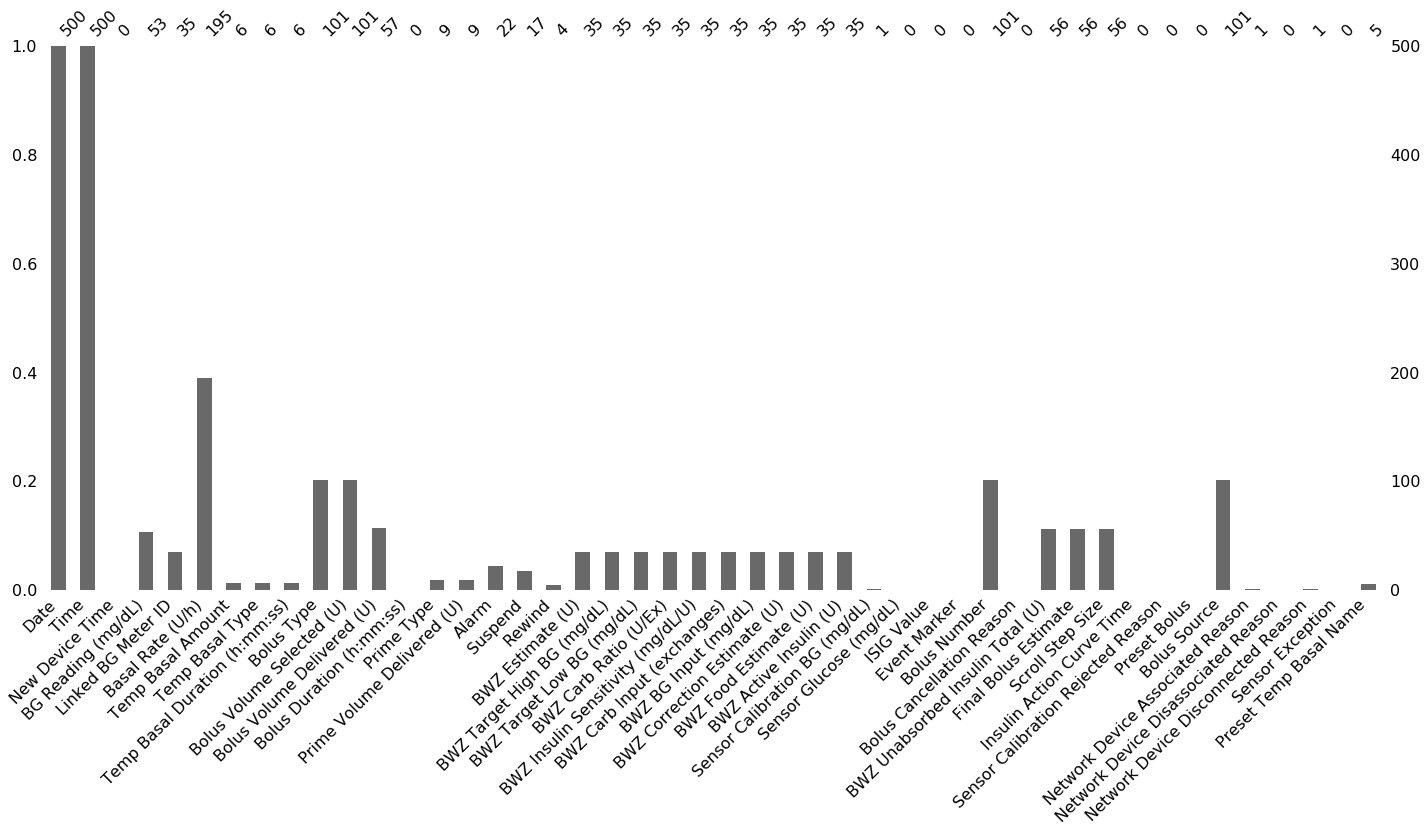

In [145]:
import missingno

%matplotlib inline

# it is necessary to sample data since otherwise the plot would be over-populated 
# se plotea diagrama de barras para ver en qué columnas hay mas nulos cogiendo 500 datos de muestra.
sample_data = data.sample(500, random_state=42)
missingno.bar(sample_data);


In [146]:
# Se definen drop_columns y se borran.
drop_columns = ['New Device Time', 'BG Reading (mg/dL)',\
                'Linked BG Meter ID', 'Temp Basal Amount',\
                'Temp Basal Type', 'Temp Basal Duration (h:mm:ss)', 'Bolus Type',\
                'Bolus Volume Selected (U)', 'Bolus Volume Delivered (U)',\
                'Bolus Duration (h:mm:ss)', 'Prime Type', 'Prime Volume Delivered (U)',\
                'Alarm', 'Suspend', 'Rewind', \
                'BWZ Target High BG (mg/dL)', 'BWZ Target Low BG (mg/dL)',\
                'Sensor Calibration BG (mg/dL)',\
                'Sensor Glucose (mg/dL)', 'ISIG Value', 'Event Marker', 'Bolus Number',\
                'Bolus Cancellation Reason',\
                'Final Bolus Estimate', 'Scroll Step Size', 'Insulin Action Curve Time',\
                'Sensor Calibration Rejected Reason', 'Preset Bolus', 'Bolus Source',\
                'Network Device Associated Reason',\
                'Network Device Disassociated Reason',\
                'Network Device Disconnected Reason', 'Sensor Exception',\
                'Preset Temp Basal Name']
data_cols_goods = data.drop(drop_columns, axis=1)
data_cols_goods.head(65)

,Date,Time,Basal Rate (U/h),BWZ Estimate (U),BWZ Carb Ratio (U/Ex),BWZ Insulin Sensitivity (mg/dL/U),BWZ Carb Input (exchanges),BWZ BG Input (mg/dL),BWZ Correction Estimate (U),BWZ Food Estimate (U),BWZ Active Insulin (U),BWZ Unabsorbed Insulin Total (U)
0,25/03/2020,23:10:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25/03/2020,23:10:52,1.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25/03/2020,23:10:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25/03/2020,23:10:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,25/03/2020,23:04:32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
60,25/03/2020,8:35:19,NaN,6.6,1.9,45.0,3.5,111.0,0.0,6.6,0.0,NaN
61,25/03/2020,8:34:48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,25/03/2020,8:32:54,1.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,25/03/2020,8:32:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
# Rellenamos los valores nulos de las columnas según los valores que hay por encima.
# Por el orden en el que salen en el archivo csv necesitamos hacer foward fill (ffill) a BWZ Unabsorbed
# insulin Total(U/h)
# y necesitamos hacer back fill (bfill) a la columna de Basal Rate (U/h)


data_cols_goods['Basal Rate (U/h)'] = data_cols_goods['Basal Rate (U/h)'].fillna(method ='bfill')
data_cols_goods['BWZ Unabsorbed Insulin Total (U)']= \
                data_cols_goods['BWZ Unabsorbed Insulin Total (U)'].fillna(method ='ffill')
data_cols_goods.head(65)

,Date,Time,Basal Rate (U/h),BWZ Estimate (U),BWZ Carb Ratio (U/Ex),BWZ Insulin Sensitivity (mg/dL/U),BWZ Carb Input (exchanges),BWZ BG Input (mg/dL),BWZ Correction Estimate (U),BWZ Food Estimate (U),BWZ Active Insulin (U),BWZ Unabsorbed Insulin Total (U)
0,25/03/2020,23:10:52,1.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,25/03/2020,23:10:52,1.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25/03/2020,23:10:52,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25/03/2020,23:10:52,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,25/03/2020,23:04:32,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
60,25/03/2020,8:35:19,1.60,6.6,1.9,45.0,3.5,111.0,0.0,6.6,0.0,0.0
61,25/03/2020,8:34:48,1.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
62,25/03/2020,8:32:54,1.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
63,25/03/2020,8:32:54,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [151]:
# Eliminamos filas que están repetidas
data_cols_goods.duplicated().sum()

16599

In [157]:
d# Se eliminan las filas con nulos
data_cols_goods.dropna()

,Date,Time,Basal Rate (U/h),BWZ Estimate (U),BWZ Carb Ratio (U/Ex),BWZ Insulin Sensitivity (mg/dL/U),BWZ Carb Input (exchanges),BWZ BG Input (mg/dL),BWZ Correction Estimate (U),BWZ Food Estimate (U),BWZ Active Insulin (U),BWZ Unabsorbed Insulin Total (U)
16,25/03/2020,22:18:54,1.95,9.5,1.0,45.0,9.5,84.0,0.0,9.5,0.0,0.0
60,25/03/2020,8:35:19,1.60,6.6,1.9,45.0,3.5,111.0,0.0,6.6,0.0,0.0
82,24/03/2020,22:26:09,1.95,5.5,1.0,45.0,5.5,99.0,0.0,5.5,0.0,0.0
103,24/03/2020,18:35:33,2.70,4.4,1.1,45.0,4.0,97.0,0.0,4.4,1.2,0.0
118,24/03/2020,15:20:03,2.20,11.2,1.5,45.0,7.5,75.0,0.0,11.2,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
38868,17/11/2015,14:21:04,0.40,9.5,1.0,50.0,9.5,126.0,0.1,9.5,1.3,0.1
38873,17/11/2015,12:22:57,0.40,3.0,1.0,50.0,3.0,103.0,0.0,3.0,0.0,0.0
38887,17/11/2015,7:40:19,0.40,2.4,0.8,50.0,3.0,101.0,0.0,2.4,0.0,0.0
38898,16/11/2015,21:34:04,0.60,8.7,1.0,50.0,8.5,173.0,1.0,8.5,0.8,0.8


In [ ]:
data_cols_goods['Date'] = pd.to_datetime(data_cols_goods['Date'])
data_cols_goods['Date'] =
#df['year'], df['month'] = df['date'].dt.year, df['date'].dt.month
df

In [149]:

#data_cols_goods.fillna(axis = 0, method = 'ffill')
data_cols_goods.to_csv('data_cols_goods.csv')
data_cols_goods.dtypes


Date                                  object
Time                                  object
Basal Rate (U/h)                     float64
BWZ Estimate (U)                     float64
BWZ Carb Ratio (U/Ex)                float64
BWZ Insulin Sensitivity (mg/dL/U)    float64
BWZ Carb Input (exchanges)           float64
BWZ BG Input (mg/dL)                 float64
BWZ Correction Estimate (U)          float64
BWZ Food Estimate (U)                float64
BWZ Active Insulin (U)               float64
BWZ Unabsorbed Insulin Total (U)     float64
dtype: object

In [37]:
data_all_parameters['Date']=pd.to_datetime(data_all_parameters['Date'])

data_all_parameters.dtypes

Date                                   datetime64[ns]
Time                                           object
New Device Time                                object
BG Reading (mg/dL)                            float64
Linked BG Meter ID                             object
Basal Rate (U/h)                              float64
Temp Basal Amount                             float64
Temp Basal Type                                object
Temp Basal Duration (h:mm:ss)                  object
Bolus Type                                     object
Bolus Volume Selected (U)                     float64
Bolus Volume Delivered (U)                    float64
Bolus Duration (h:mm:ss)                       object
Prime Type                                     object
Prime Volume Delivered (U)                    float64
Alarm                                          object
Suspend                                        object
Rewind                                         object
BWZ Estimate (U)            